In [1]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, rename_values, replace_values_by_condition
from ipynb.fs.full.plots import heatmap

In [2]:
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [4]:
df[['D10_ML_Management_Framework_None', 'D10_ML_Management_Framework_CRISP-DM', 'D10_ML_Management_Framework_Kanban',
    'D10_ML_Management_Framework_Lean', 'D10_ML_Management_Framework_RUP', 'D10_ML_Management_Framework_SAFe',
    'D10_ML_Management_Framework_Scrum', 'D11_Agile_Development']].head()

,D10_ML_Management_Framework_None,D10_ML_Management_Framework_CRISP-DM,D10_ML_Management_Framework_Kanban,D10_ML_Management_Framework_Lean,D10_ML_Management_Framework_RUP,D10_ML_Management_Framework_SAFe,D10_ML_Management_Framework_Scrum,D11_Agile_Development
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,Totally traditional
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Balanced between agile and traditional
4,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,Balanced between agile and traditional
5,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Totally agile
6,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Balanced between agile and traditional


In [5]:
frameworks_mapping = {
    'D10_ML_Management_Framework_None': 'None',
    'D10_ML_Management_Framework_CRISP-DM': 'CRISP-DM',
    'D10_ML_Management_Framework_Kanban': 'Kanban',
    'D10_ML_Management_Framework_Lean': 'Lean',
    'D10_ML_Management_Framework_RUP': 'RUP',
    'D10_ML_Management_Framework_SAFe': 'SAFe',
    'D10_ML_Management_Framework_Scrum': 'Scrum'
}

In [6]:
df = replace_values_by_condition(df, 'D11_Agile_Development', '0', "I don't know", 'eq')

In [7]:
frameworks = []
agility = []
framework_agility = []
for index, row in df.iterrows():
    for f in frameworks_mapping:
        # formatted name for framework
        frameworks.append(frameworks_mapping[f])
        # what did the guy who answered an specific framework about agility
        agility.append(row['D11_Agile_Development'])
        # match
        if row[f] == 'not quoted':
            framework_agility.append(0)
        elif row[f] == 'quoted':
            framework_agility.append(1)

In [8]:
# create a custom dataframe to handle only the columns that we want
d10_11_df = pd.DataFrame()
d10_11_df['Framework'] = frameworks
d10_11_df['Agility'] = agility
d10_11_df['Answers'] = framework_agility

In [9]:
d10_11_df = d10_11_df.groupby(['Framework', 'Agility']).sum().reset_index()

In [10]:
d10_11_df

,Framework,Agility,Answers
0,CRISP-DM,Balanced between agile and traditional,17
1,CRISP-DM,I don't know,1
2,CRISP-DM,Mostly agile,14
3,CRISP-DM,Mostly traditional,7
4,CRISP-DM,Totally agile,2
5,CRISP-DM,Totally traditional,0
6,Kanban,Balanced between agile and traditional,28
7,Kanban,I don't know,2
8,Kanban,Mostly agile,35
9,Kanban,Mostly traditional,6


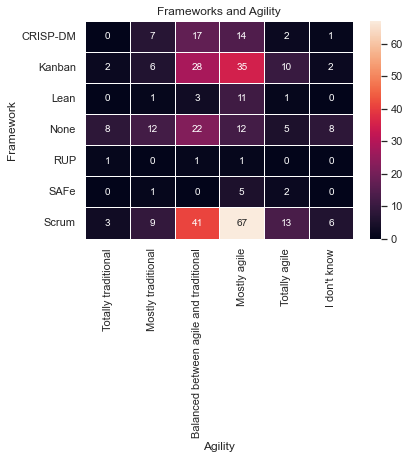

In [21]:
heatmap(d10_11_df, 'Framework', 'Agility', 'Answers', order=[5, 3, 0, 2, 4, 1], title='Frameworks and Agility')